In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定
#font = FontProperties(fname="/home/gezi/soft/simsunttc/simsun.ttc", size=12)  #size可不用指定

# linux 的中文字体 /usr/share/fonts/simhei/simhei.ttf

#df = DataFrame({"score":[80, 90]}, index=["张三","李四"]) 
#ax = df.plot(kind = 'bar', rot = 0) 
#labels = [label.decode("utf-8") for label in df.index.values] 
#ax.set_xticklabels(labels, fontproperties=font) 
#plt.show()

In [4]:
from IPython.display import Image

In [5]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn/epoch/model.cpkt-20-25500', '')

#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'basic', '')

#flags.DEFINE_string('op_name', 'words_importance', 'default is cosine sim importance or encoder_words_importance for maxpooling importance')
flags.DEFINE_string('op_name', 'encoder_words_importance', 'default is cosine sim importance or encoder_words_importance for maxpooling importance')
#flags.DEFINE_string('op_name', 'text_importance', 'default is cosine sim importance or encoder_words_importance for maxpooling importance')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text, text2=None):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=True)
  print('text_ids', text_ids)
    
  #print(tf.get_collection('debug_seqeuence'))
  #x  =  predictor.inference(['debug_seqeuence'], index=0,
  #                                  feed_dict= {
  #                                    'rnn/main/text:0': [text_ids]
  #                                    })

  #print(x)
  #return
    
    
  if text2 is not None:
    text2 = utf82gbk(text2)
    text2_ids = text2ids.text2ids(text2, FLAGS.seg_method_, feed_single=True)
    score = predictor.inference(['textsim'], 
                                    feed_dict= {
                                      'rnn/main/text:0': [text_ids],
                                      'rnn/main/text2:0': [text2_ids]
                                      #'rnn/main/text2:0':[gezi.pad([1], 50)]
                                      })
    print(score[0][0], len(score[0][0]))
    return score[0][0]

  #seq_len = 50	


  #print('words', words)
  argmax_encode = predictor.inference([FLAGS.op_name], 
                                    feed_dict= {
                                      'rnn/main/text:0': [text_ids]
                                      })
  print('argmax_encode', argmax_encode[0])
  

  argmax_encode = argmax_encode[0][0]

  print('----', len(argmax_encode))

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=True, append_start=True, append_end=True)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  #argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
    
  argmaxs = argmax_encode[:seq_len]
  print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  y = [100.0*n/np.sum(argmaxs) for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  for word, score in zip(words, y):
    print(word, score)
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn/model.ckpt-49.4-63000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn/model.ckpt-49.4-63000


import graph ok /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn/model.ckpt-49.4-63000.meta
restore ok /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn/model.ckpt-49.4-63000


In [7]:
#predict('美女', '美女')
#predict('帅哥戴墨镜', '帅哥')
#predict('帅哥戴墨镜', '墨镜')

text_ids [1311, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[159 189 164   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 1311, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [159 189 164] 512 3
美女
<S> 31.0546875
美女 36.9140625
</S> 32.03125


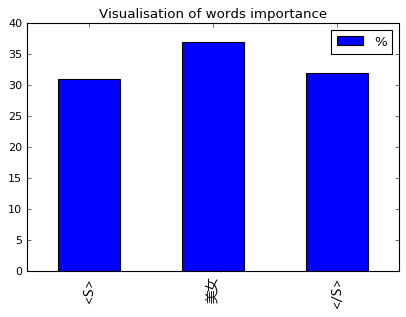

text_ids [6829, 1355, 12429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[105  85  61 115 146   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 6829, 1355, 12429, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [105  85  61 115 146] 512 5
帅哥戴墨镜
<S> 20.5078125
帅哥 16.6015625
戴 11.9140625
墨镜 22.4609375
</S> 28.515625


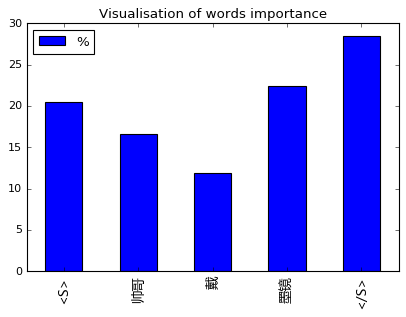

text_ids [3935, 640, 5, 80, 1321, 508, 3, 34, 269, 3, 2239, 25, 3, 1407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 89  74  45  10   8  12  26   4   7  25   7   8   7   4  60 126   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 3935, 640, 5, 80, 1321, 508, 3, 34, 269, 3, 2239, 25, 3, 1407, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 89  74  45  10   8  12  26   4   7  25   7   8   7   4  60 126] 512 16
初中孩子的免费精品课，用手机，在家上，省心
<S> 17.3828125
初中 14.453125
孩子 8.7890625
的 1.953125
免费 1.5625
精品 2.34375
课 5.078125
， 0.78125
用 1.3671875
手机 4.8828125
， 1.3671875
在家 1.5625
上 1.3671875
， 0.78125
省心 11.71875
</S> 24.609375


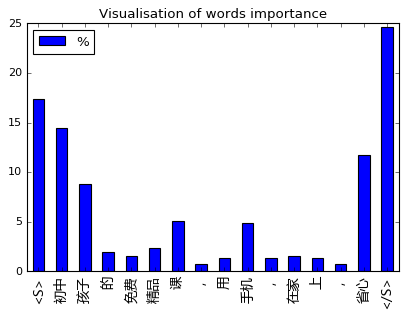

text_ids [17, 34, 1393, 324, 29, 199, 41, 7663, 3, 993, 269, 712, 56, 199, 1362, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 93  27  17  45  12   6  13   3  24   3  13  25  17  10  27  33 144   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 17, 34, 1393, 324, 29, 199, 41, 7663, 3, 993, 269, 712, 56, 199, 1362, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 93  27  17  45  12   6  13   3  24   3  13  25  17  10  27  33 144] 512 17
好用颜值高才是王道，这些手机现在买才实惠
<S> 18.1640625
好 5.2734375
用 3.3203125
颜 8.7890625
值 2.34375
高 1.171875
才 2.5390625
是 0.5859375
王道 4.6875
， 0.5859375
这些 2.5390625
手机 4.8828125
现在 3.3203125
买 1.953125
才 5.2734375
实惠 6.4453125
</S> 28.125


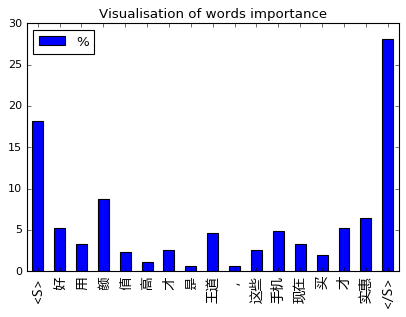

In [8]:
predict('美女')
predict('帅哥戴墨镜')
predict('初中孩子的免费精品课，用手机，在家上，省心')
predict('好用颜值高才是王道，这些手机现在买才实惠')

text_ids [243, 350, 116, 1598, 135, 1401, 6, 18, 1208, 200, 878, 402, 365, 43, 579, 46, 428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[105  35  33  18  26   6  11   2   3  16  21  15  10   4   6   8  20  49
  124   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 243, 350, 116, 1598, 135, 1401, 6, 18, 1208, 200, 878, 402, 365, 43, 579, 46, 428, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [105  35  33  18  26   6  11   2   3  16  21  15  10   4   6   8  20  49
 124] 512 19
比信用卡分期更划算！有身份证就能申请10-30万贷款
<S> 20.5078125
比 6.8359375
信用 6.4453125
卡 3.515625
分期 5.078125
更 1.171875
划算 2.1484375
！ 0.390625
有 0.5859375
身份 3.125
证 4.1015625
就能 2.9296875
申请 1.953125
10 0.78125
- 1.171875
30 1.5625
万 3.90625
贷款 9.5703125
</S> 24.21875


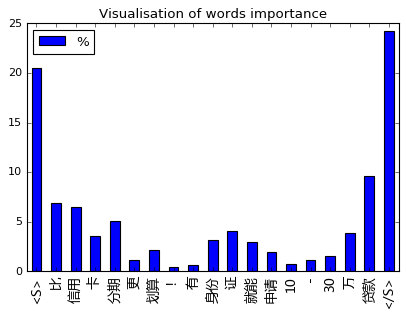

text_ids [4, 16, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 89  35  25  73  13  61   5  12   1   8   2   0   5   6   7   3  16  14
  137   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 4, 16, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 89  35  25  73  13  61   5  12   1   8   2   0   5   6   7   3  16  14
 137] 512 19
1890元往返飞旧金山?真是赚了,我一直在这里买!
<S> 17.3828125
<NUM> 6.8359375
元 4.8828125
往返 14.2578125
飞 2.5390625
旧金山 11.9140625
? 0.9765625
真 2.34375
是 0.1953125
赚 1.5625
了 0.390625
, 0.0
我 0.9765625
一直 1.171875
在 1.3671875
这里 0.5859375
买 3.125
! 2.734375
</S> 26.7578125


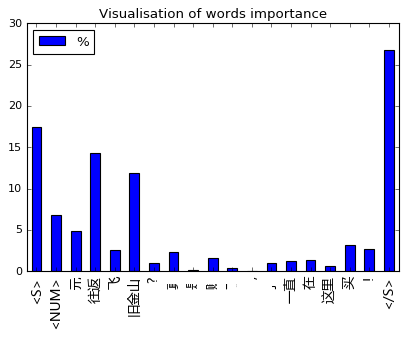

text_ids [14, 199, 41, 976, 620, 100, 844, 5, 3709, 4480, 2260, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 94  13  19   5  16  15  36  59   3  35  28  36  15 138   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 14, 199, 41, 976, 620, 100, 844, 5, 3709, 4480, 2260, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 94  13  19   5  16  15  36  59   3  35  28  36  15 138] 512 14
这才是上班族修本科的正确打开方式！
<S> 18.359375
这 2.5390625
才 3.7109375
是 0.9765625
上班 3.125
族 2.9296875
修 7.03125
本科 11.5234375
的 0.5859375
正确 6.8359375
打开 5.46875
方式 7.03125
！ 2.9296875
</S> 26.953125


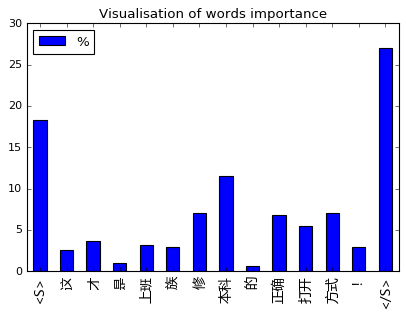

In [9]:
predict('比信用卡分期更划算！有身份证就能申请10-30万贷款')
predict('1890元往返飞旧金山?真是赚了,我一直在这里买!')
predict('这才是上班族修本科的正确打开方式！')

text_ids [19589, 36, 737, 8, 74, 626, 852, 245, 7, 993, 5404, 340, 12, 9771, 12322, 6140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 95  22  16  21   3   3  18  23   6   1   5  33   3   1  46  20  59 137
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 19589, 36, 737, 8, 74, 626, 852, 245, 7, 993, 5404, 340, 12, 9771, 12322, 6140, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 95  22  16  21   3   3  18  23   6   1   5  33   3   1  46  20  59 137] 512 18
国庆到成都不要住酒店啦,这些民宿带你领略别样风情
<S> 18.5546875
国庆 4.296875
到 3.125
成都 4.1015625
不 0.5859375
要 0.5859375
住 3.515625
酒店 4.4921875
啦 1.171875
, 0.1953125
这些 0.9765625
民宿 6.4453125
带 0.5859375
你 0.1953125
领略 8.984375
别样 3.90625
风情 11.5234375
</S> 26.7578125


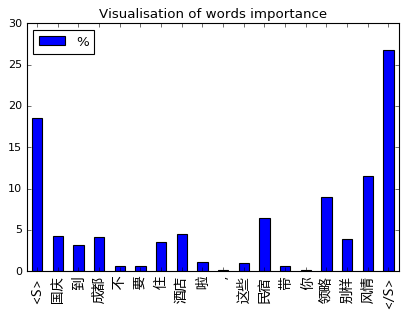

text_ids [8145, 39, 269, 133, 8, 256, 8145, 33, 478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 87  69  23  39   7   7  11  28  30  86 125   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 8145, 39, 269, 133, 8, 256, 8145, 33, 478, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 87  69  23  39   7   7  11  28  30  86 125] 512 11
低头玩手机?不如低头学英语
<S> 16.9921875
低头 13.4765625
玩 4.4921875
手机 7.6171875
? 1.3671875
不 1.3671875
如 2.1484375
低头 5.46875
学 5.859375
英语 16.796875
</S> 24.4140625


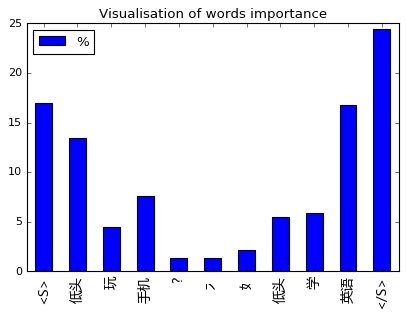

text_ids [6829, 6, 1277, 2671, 15, 59, 341, 2532, 87, 18, 400, 529, 6, 49, 378, 78, 58, 172, 21, 3697, 5718, 542, 18, 1262, 2511, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 72  52   2  12  54   4   3   4   9   3   1   4   3   1  11  13  13   7
    8   1  29  18  11   2  10  19  10 136   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 6829, 6, 1277, 2671, 15, 59, 341, 2532, 87, 18, 400, 529, 6, 49, 378, 78, 58, 172, 21, 3697, 5718, 542, 18, 1262, 2511, 12, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 72  52   2  12  54   4   3   4   9   3   1   4   3   1  11  13  13   7
   8   1  29  18  11   2  10  19  10 136] 512 28
帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你
<S> 14.0625
帅哥 10.15625
！ 0.390625
世界 2.34375
名表 10.546875
在 0.78125
我 0.5859375
这里 0.78125
并 1.7578125
没 0.5859375
有 0.1953125
这么 0.78125
贵 0.5859375
！ 0.1953125
加 2.1484375
微 2.5390625
信 2.5390625
送 

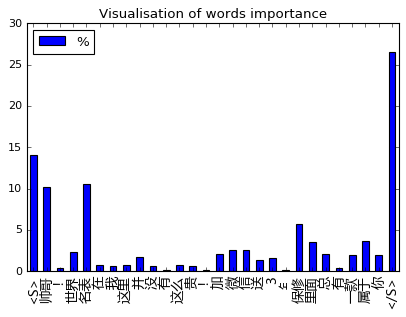

text_ids [2520, 1741, 11, 218, 11, 478, 2583, 885, 508, 7, 136, 640, 3755, 279, 25, 478, 20, 4884, 16, 1777, 508, 80, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 80  48  51   3   7   0  27  19  11   9   2   2   9   8   5   0  18   6
   17  13  18   9  10  22 118   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 2520, 1741, 11, 218, 11, 478, 2583, 885, 508, 7, 136, 640, 3755, 279, 25, 478, 20, 4884, 16, 1777, 508, 80, 865, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 80  48  51   3   7   0  27  19  11   9   2   2   9   8   5   0  18   6
  17  13  18   9  10  22 118] 512 25
精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取
<S> 15.625
精彩 9.375
外教 9.9609375
一 0.5859375
对 1.3671875
一 0.0
英语 5.2734375
主题 3.7109375
活动 2.1484375
课 1.7578125
, 0.390625
让 0.390625
孩子 1.7578125
从此 1.5625
爱 0.9765625
上 0.0
英语 3.515625
! 1.171875
288 3.3203125
元 

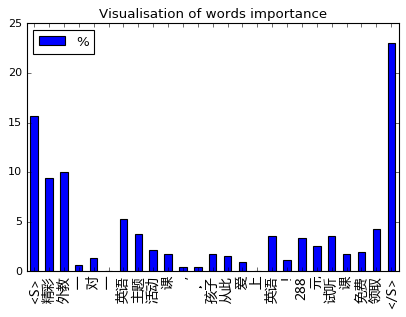

In [10]:
predict('国庆到成都不要住酒店啦,这些民宿带你领略别样风情')
predict('低头玩手机?不如低头学英语')
predict('帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你')
predict('精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取')

text_ids [2280, 4880, 33, 90, 1294, 133, 33, 2193, 328, 942, 7, 612, 36, 163, 27, 8, 978, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[105  38  50  14   8  14   5  16  36  14  14   1   4   2   8   2   1  25
    9 146   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 2280, 4880, 33, 90, 1294, 133, 33, 2193, 328, 942, 7, 612, 36, 163, 27, 8, 978, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [105  38  50  14   8  14   5  16  36  14  14   1   4   2   8   2   1  25
   9 146] 512 20
打工回来学点啥?学厨师当老板,走到哪都不怕！
<S> 20.5078125
打工 7.421875
回来 9.765625
学 2.734375
点 1.5625
啥 2.734375
? 0.9765625
学 3.125
厨师 7.03125
当 2.734375
老板 2.734375
, 0.1953125
走 0.78125
到 0.390625
哪 1.5625
都 0.390625
不 0.1953125
怕 4.8828125
！ 1.7578125
</S> 28.515625


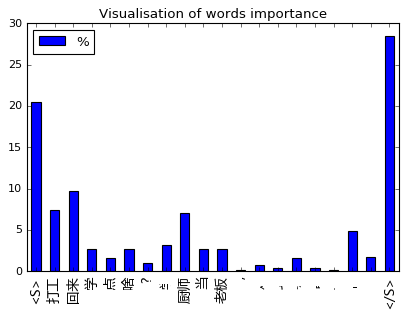

text_ids [4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[103  93  44   2   6  10  51   1  12  14  21  16 139   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [103  93  44   2   6  10  51   1  12  14  21  16 139] 512 13
水饺加盟,无需厨师,总部扶持创业!
<S> 20.1171875
水饺 18.1640625
加盟 8.59375
, 0.390625
无 1.171875
需 1.953125
厨师 9.9609375
, 0.1953125
总部 2.34375
扶持 2.734375
创业 4.1015625
! 3.125
</S> 27.1484375


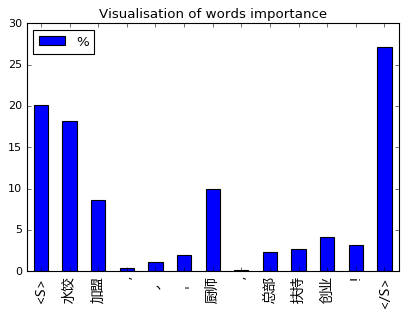

text_ids [4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[104  91  45   2   4   9  59   1  15  21  35 126   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [104  91  45   2   4   9  59   1  15  21  35 126] 512 12
水饺加盟,无需厨师,总部扶持创业
<S> 20.3125
水饺 17.7734375
加盟 8.7890625
, 0.390625
无 0.78125
需 1.7578125
厨师 11.5234375
, 0.1953125
总部 2.9296875
扶持 4.1015625
创业 6.8359375
</S> 24.609375


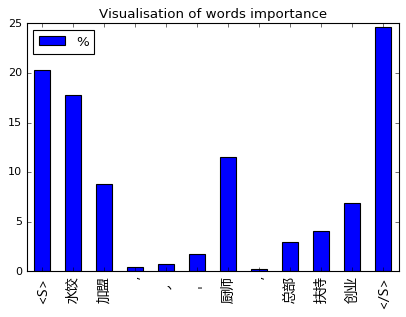

In [11]:
predict('打工回来学点啥?学厨师当老板,走到哪都不怕！')
predict('水饺加盟,无需厨师,总部扶持创业!')
predict('水饺加盟,无需厨师,总部扶持创业')

text_ids [1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 87  85  32  52  12   3  10   9   8  22  11  19   4  10 148   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 87  85  32  52  12   3  10   9   8  22  11  19   4  10 148] 512 15
iPhone隐藏功能：高铁也能在线选座了！
<S> 16.9921875
iphone 16.6015625
隐藏 6.25
功能 10.15625
： 2.34375
高 0.5859375
铁 1.953125
也 1.7578125
能 1.5625
在线 4.296875
选 2.1484375
座 3.7109375
了 0.78125
！ 1.953125
</S> 28.90625


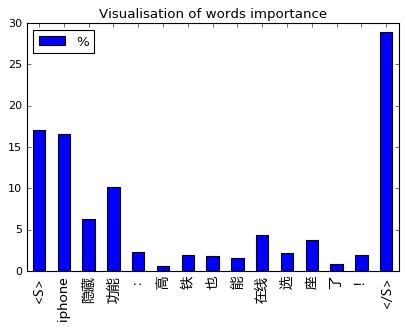

In [12]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

text_ids [4447, 7542, 9634, 2835, 8124, 7, 9771, 3086, 5, 3612, 7, 136, 7808, 3254, 25, 2835, 5341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 96  45  23  32  33  40   0   2  18   4   2   0   2   8   4   8  27  49
  119   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 4447, 7542, 9634, 2835, 8124, 7, 9771, 3086, 5, 3612, 7, 136, 7808, 3254, 25, 2835, 5341, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 96  45  23  32  33  40   0   2  18   4   2   0   2   8   4   8  27  49
 119] 512 19
携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀
<S> 18.75
携手 8.7890625
欧歌 4.4921875
步入 6.25
音乐 6.4453125
殿堂 7.8125
, 0.0
领略 0.390625
ta 3.515625
的 0.78125
神奇 0.390625
, 0.0
让 0.390625
心灵 1.5625
插 0.78125
上 1.5625
音乐 5.2734375
翅膀 9.5703125
</S> 23.2421875


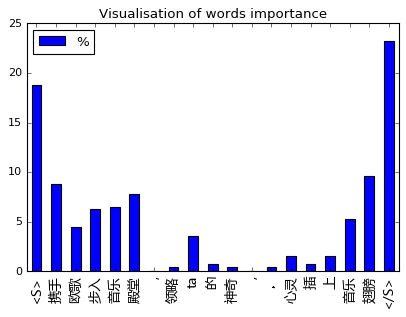

In [13]:
predict('携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀')

text_ids [949, 1009, 852, 253, 7, 1761, 3744, 131, 7, 763, 728, 30, 10, 1397, 94, 5, 407, 1646, 68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 82  52  49  53   7   0  20  14  18   0   6  12   6   1   4   1   2  11
   20  14 140   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 949, 1009, 852, 253, 7, 1761, 3744, 131, 7, 763, 728, 30, 10, 1397, 94, 5, 407, 1646, 68, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 82  52  49  53   7   0  20  14  18   0   6  12   6   1   4   1   2  11
  20  14 140] 512 21
底价预订酒店服务,交通便利设,施齐全 欢迎您的光临.
<S> 16.015625
底价 10.15625
预订 9.5703125
酒店 10.3515625
服务 1.3671875
, 0.0
交通 3.90625
便利 2.734375
设 3.515625
, 0.0
施 1.171875
齐 2.34375
全 1.171875
  0.1953125
欢迎 0.78125
您 0.1953125
的 0.390625
光 2.1484375
临 3.90625
. 2.734375
</S> 27.34375


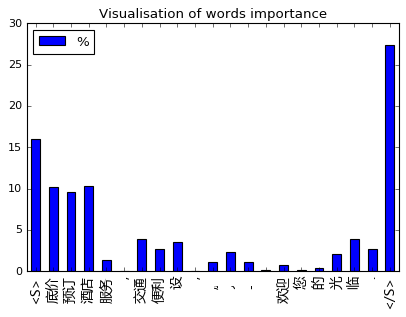

In [14]:
predict('底价预订酒店服务,交通便利设,施齐全 欢迎您的光临.')

text_ids [8854, 2277, 583, 3581, 852, 197, 7, 11, 218, 11, 2277, 197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 86  68  64  23  22  37  15   3   1   1   2  38  28 124   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 8854, 2277, 583, 3581, 852, 197, 7, 11, 218, 11, 2277, 197, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 86  68  64  23  22  37  15   3   1   1   2  38  28 124] 512 14
巨人游泳五星级酒店培训,一对一游泳培训
<S> 16.796875
巨人 13.28125
游泳 12.5
五 4.4921875
星级 4.296875
酒店 7.2265625
培训 2.9296875
, 0.5859375
一 0.1953125
对 0.1953125
一 0.390625
游泳 7.421875
培训 5.46875
</S> 24.21875


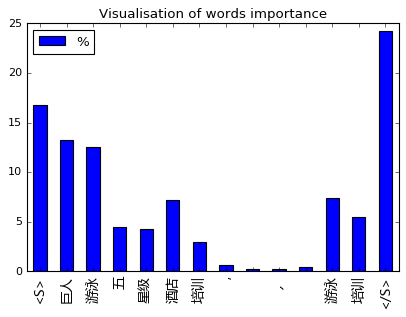

In [15]:
predict('巨人游泳五星级酒店培训,一对一游泳培训')

text_ids [1216, 2016, 27, 136, 640, 32, 881, 7345, 33, 478, 44, 640, 3811, 3065, 2812, 252, 478, 3, 912, 579, 57, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 86  22  27   8   4  19   3  18  12  19  16   2  18  20  10  24   2  28
    4  14  11  12   6 127   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 1216, 2016, 27, 136, 640, 32, 881, 7345, 33, 478, 44, 640, 3811, 3065, 2812, 252, 478, 3, 912, 579, 57, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 86  22  27   8   4  19   3  18  12  19  16   2  18  20  10  24   2  28
   4  14  11  12   6 127] 512 24
为什么妈妈都让孩子来vipjr学英语？孩子大胆开口流利说英语，只要30天！
<S> 16.796875
为什么 4.296875
妈妈 5.2734375
都 1.5625
让 0.78125
孩子 3.7109375
来 0.5859375
vip 3.515625
jr 2.34375
学 3.7109375
英语 3.125
？ 0.390625
孩子 3.515625
大胆 3.90625
开口 1.953125
流利 4.6875
说 0.390625
英语 5.46875
， 0.78125
只要 2.734

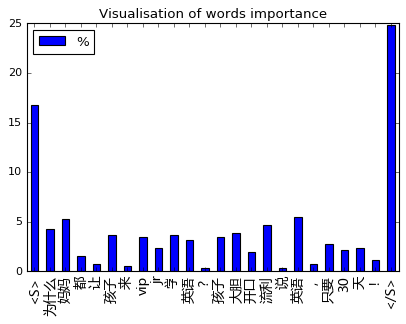

In [16]:
predict('为什么妈妈都让孩子来vipjr学英语？孩子大胆开口流利说英语，只要30天！')

text_ids [4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 97 102  22  69   8  10   1   6   2   0   5   8   7   4  17  14 140   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 97 102  22  69   8  10   1   6   2   0   5   8   7   4  17  14 140] 512 17
往返飞旧金山?真是赚了,我一直在这里买!
<S> 18.9453125
往返 19.921875
飞 4.296875
旧金山 13.4765625
? 1.5625
真 1.953125
是 0.1953125
赚 1.171875
了 0.390625
, 0.0
我 0.9765625
一直 1.5625
在 1.3671875
这里 0.78125
买 3.3203125
! 2.734375
</S> 27.34375


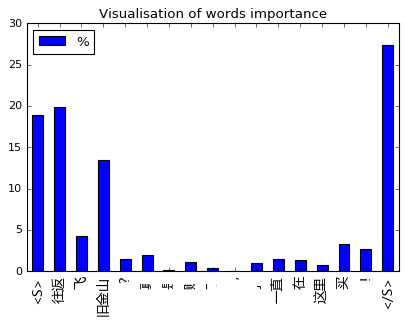

In [17]:
predict('往返飞旧金山?真是赚了,我一直在这里买!')

text_ids [8, 74, 626, 852, 3, 341, 5, 5404, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[102  10  19  50  37   9  11   1 101  27 145   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 8, 74, 626, 852, 3, 341, 5, 5404, 17, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [102  10  19  50  37   9  11   1 101  27 145] 512 11
不要住酒店，这里的民宿好
<S> 19.921875
不 1.953125
要 3.7109375
住 9.765625
酒店 7.2265625
， 1.7578125
这里 2.1484375
的 0.1953125
民宿 19.7265625
好 5.2734375
</S> 28.3203125


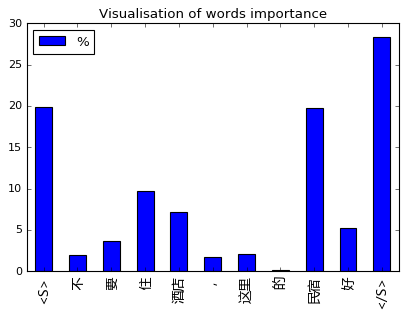

In [18]:
predict('不要住酒店，这里的民宿好')

text_ids [8, 74, 626, 5404, 3, 341, 5, 852, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 95  10  22  48 105   8  10   6  48  26 134   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 8, 74, 626, 5404, 3, 341, 5, 852, 17, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 95  10  22  48 105   8  10   6  48  26 134] 512 11
不要住民宿，这里的酒店好
<S> 18.5546875
不 1.953125
要 4.296875
住 9.375
民宿 20.5078125
， 1.5625
这里 1.953125
的 1.171875
酒店 9.375
好 5.078125
</S> 26.171875


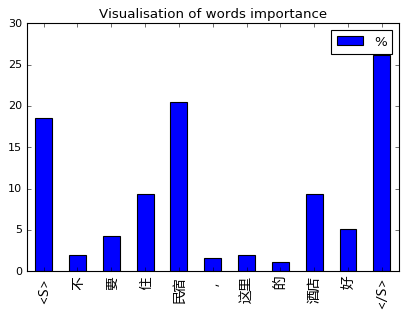

In [19]:
predict('不要住民宿，这里的酒店好')

text_ids [247, 189, 4845, 2881, 12429, 3, 417, 52, 175, 9, 401, 3, 1072, 174, 23, 6114, 556, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 89  22  21  37  10  64   6   7   3   3   1   6   4  25   5   3  26  29
   11 140   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 247, 189, 4845, 2881, 12429, 3, 417, 52, 175, 9, 401, 3, 1072, 174, 23, 6114, 556, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 89  22  21  37  10  64   6   7   3   3   1   6   4  25   5   3  26  29
  11 140] 512 20
男神开车专用墨镜，怎么能少了它，降价后就快抢完了
<S> 17.3828125
男 4.296875
神 4.1015625
开车 7.2265625
专用 1.953125
墨镜 12.5
， 1.171875
怎么 1.3671875
能 0.5859375
少 0.5859375
了 0.1953125
它 1.171875
， 0.78125
降价 4.8828125
后 0.9765625
就 0.5859375
快抢 5.078125
完 5.6640625
了 2.1484375
</S> 27.34375


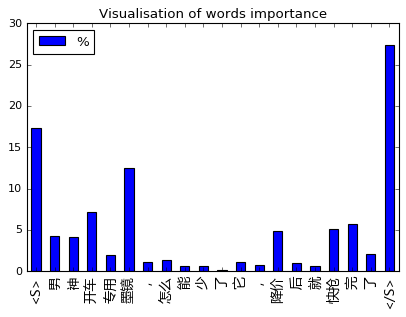

In [20]:
predict('男神开车专用墨镜，怎么能少了它，降价后就快抢完了')

text_ids [59, 5, 22092, 5705, 3781, 914, 326, 3, 38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 95  17  15  54  32  34   2  15   3   2   8   9   1  29  16  43 137   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 59, 5, 22092, 5705, 3781, 914, 326, 3, 38, 1262, 1553, 5, 12429, 343, 1826, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 95  17  15  54  32  34   2  15   3   2   8   9   1  29  16  43 137] 512 17
我的家乡惠州越来越热，选一款喜欢的墨镜很重要
<S> 18.5546875
我 3.3203125
的 2.9296875
家乡 10.546875
惠州 6.25
越来 6.640625
越 0.390625
热 2.9296875
， 0.5859375
选 0.390625
一款 1.5625
喜欢 1.7578125
的 0.1953125
墨镜 5.6640625
很 3.125
重要 8.3984375
</S> 26.7578125


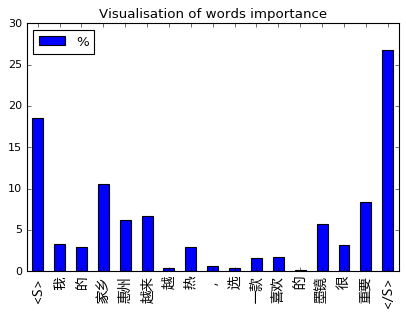

In [21]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要')

text_ids [59, 5, 22092, 3781, 914, 326, 3, 38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 96  20  13  52  22   4  23   2   3  13  11   1  41  21  52 138   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 59, 5, 22092, 3781, 914, 326, 3, 38, 1262, 1553, 5, 12429, 343, 1826, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 96  20  13  52  22   4  23   2   3  13  11   1  41  21  52 138] 512 16
我的家乡越来越热，选一款喜欢的墨镜很重要
<S> 18.75
我 3.90625
的 2.5390625
家乡 10.15625
越来 4.296875
越 0.78125
热 4.4921875
， 0.390625
选 0.5859375
一款 2.5390625
喜欢 2.1484375
的 0.1953125
墨镜 8.0078125
很 4.1015625
重要 10.15625
</S> 26.953125


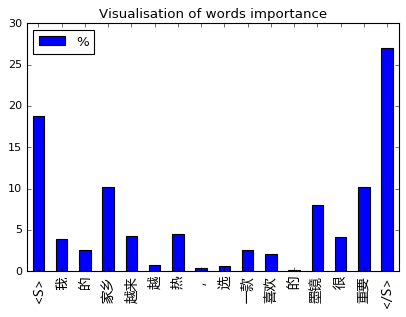

In [22]:
predict('我的家乡越来越热，选一款喜欢的墨镜很重要')

text_ids [38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[101  35  29  23   2  87  24  70 141   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 38, 1262, 1553, 5, 12429, 343, 1826, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [101  35  29  23   2  87  24  70 141] 512 9
选一款喜欢的墨镜很重要
<S> 19.7265625
选 6.8359375
一款 5.6640625
喜欢 4.4921875
的 0.390625
墨镜 16.9921875
很 4.6875
重要 13.671875
</S> 27.5390625


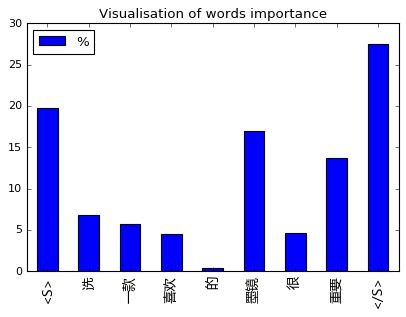

In [23]:
predict('选一款喜欢的墨镜很重要')

text_ids [10182, 3404, 3199, 1798, 12022, 1744, 1456, 4075, 605, 554, 10, 645, 1246, 370, 5063, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 96  45  25  18  15  13   9   8  34   7   5   1   4  11  14  69 138   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 10182, 3404, 3199, 1798, 12022, 1744, 1456, 4075, 605, 554, 10, 645, 1246, 370, 5063, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 96  45  25  18  15  13   9   8  34   7   5   1   4  11  14  69 138] 512 17
asics助力#{地域}鸟巢半马 推限量版跑鞋
<S> 18.75
asics 8.7890625
助力 4.8828125
# 3.515625
{ 2.9296875
地域 2.5390625
} 1.7578125
鸟 1.5625
巢 6.640625
半 1.3671875
马 0.9765625
  0.1953125
推 0.78125
限量 2.1484375
版 2.734375
跑鞋 13.4765625
</S> 26.953125


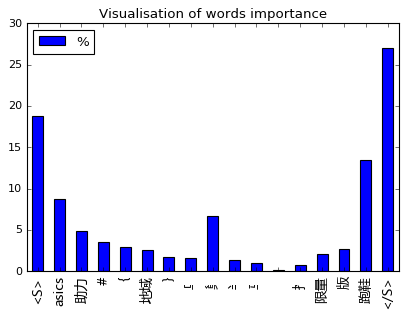

In [24]:
predict('asics助力#{地域}鸟巢半马 推限量版跑鞋')

text_ids [365, 196, 7327, 7, 609, 57, 7231, 7, 18, 2039, 1153, 7, 1352, 4393, 7, 566, 5411, 7, 1397, 2289, 561, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 90  35  32  63   0   7   2  16   1   1   5   4   0   8  15   0   9  29
    1  12  17  35 130   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 365, 196, 7327, 7, 609, 57, 7231, 7, 18, 2039, 1153, 7, 1352, 4393, 7, 566, 5411, 7, 1397, 2289, 561, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 90  35  32  63   0   7   2  16   1   1   5   4   0   8  15   0   9  29
   1  12  17  35 130] 512 23
10套起订,7天到货,有现货供应,精选面料,质量上乘,欢迎电话咨询
<S> 17.578125
10 6.8359375
套 6.25
起订 12.3046875
, 0.0
7 1.3671875
天 0.390625
到货 3.125
, 0.1953125
有 0.1953125
现货 0.9765625
供应 0.78125
, 0.0
精选 1.5625
面料 2.9296875
, 0.0
质量 1.7578125
上乘 5.6640625
, 0.1953125
欢迎 2.34375
电话 3.3203125
咨询 6.8

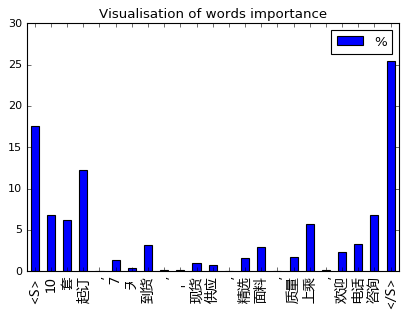

In [25]:
predict('10套起订,7天到货,有现货供应,精选面料,质量上乘,欢迎电话咨询')

text_ids [482, 6, 836, 2225, 16242, 4155, 850, 34, 628, 142, 6753, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 94  33   3  31  19  21  83  23   6  13   7  33   8 138   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 482, 6, 836, 2225, 16242, 4155, 850, 34, 628, 142, 6753, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 94  33   3  31  19  21  83  23   6  13   7  33   8 138] 512 14
牛！亲闺密语内衣竟然用她做模特！
<S> 18.359375
牛 6.4453125
！ 0.5859375
亲 6.0546875
闺 3.7109375
密语 4.1015625
内衣 16.2109375
竟然 4.4921875
用 1.171875
她 2.5390625
做 1.3671875
模特 6.4453125
！ 1.5625
</S> 26.953125


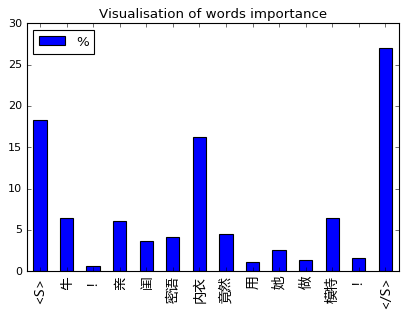

In [26]:
predict('牛！亲闺密语内衣竟然用她做模特！')

text_ids [1469, 1610, 832, 666, 3, 691, 1630, 72, 3, 136, 12, 272, 3047, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 90  89  52  22  11   3  19  27  14   2   4   4  16  19  10 130   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 1469, 1610, 832, 666, 3, 691, 1630, 72, 3, 136, 12, 272, 3047, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 90  89  52  22  11   3  19  27  14   2   4   4  16  19  10 130] 512 16
室内净化生意火爆，除甲醛加盟，让你赚大钱！
<S> 17.578125
室内 17.3828125
净化 10.15625
生意 4.296875
火爆 2.1484375
， 0.5859375
除 3.7109375
甲醛 5.2734375
加盟 2.734375
， 0.390625
让 0.78125
你 0.78125
赚 3.125
大钱 3.7109375
！ 1.953125
</S> 25.390625


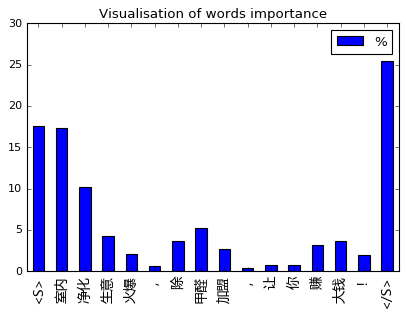

In [27]:
predict('室内净化生意火爆，除甲醛加盟，让你赚大钱！')

text_ids [1349, 21, 2941, 470, 525, 3, 11, 196, 7327, 3, 80, 623, 167, 310, 3, 1202, 57, 5754, 80, 1911, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 76  47   6  62  25  10   0   1  13  11   6   6  16  13   4   2  10   9
   24   6  18   8 139   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 1349, 21, 2941, 470, 525, 3, 11, 196, 7327, 3, 80, 623, 167, 310, 3, 1202, 57, 5754, 80, 1911, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 76  47   6  62  25  10   0   1  13  11   6   6  16  13   4   2  10   9
  24   6  18   8 139] 512 23
25年西服定制经验，一套起订，免费上门量身，15天交货免费送货！
<S> 14.84375
25 9.1796875
年 1.171875
西服 12.109375
定制 4.8828125
经验 1.953125
， 0.0
一 0.1953125
套 2.5390625
起订 2.1484375
， 1.171875
免费 1.171875
上门 3.125
量 2.5390625
身 0.78125
， 0.390625
15 1.953125
天 1.7578125
交货 4.6875
免费 1.171875
送货 3.515625
！ 1.5

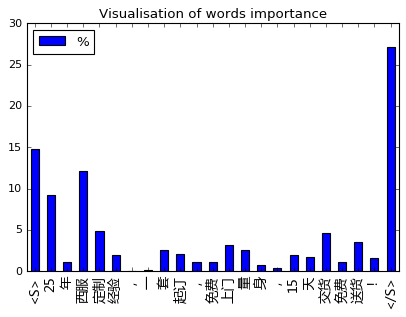

In [28]:
predict('25年西服定制经验，一套起订，免费上门量身，15天交货免费送货！')

text_ids [1115, 14384, 43, 43, 59, 5, 2856, 3870, 56, 19135, 96, 7, 7988, 66, 212, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 98  23  27   2   3   1   1  49  78   4  23   5   1   4  13  17  38 125
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 1115, 14384, 43, 43, 59, 5, 2856, 3870, 56, 19135, 96, 7, 7988, 66, 212, 2728, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 98  23  27   2   3   1   1  49  78   4  23   5   1   4  13  17  38 125] 512 18
时尚日记--我的欧美女装买手电商,七天包邮退换
<S> 19.140625
时尚 4.4921875
日记 5.2734375
- 0.390625
- 0.5859375
我 0.1953125
的 0.1953125
欧美 9.5703125
女装 15.234375
买 0.78125
手电 4.4921875
商 0.9765625
, 0.1953125
七天 0.78125
包 2.5390625
邮 3.3203125
退换 7.421875
</S> 24.4140625


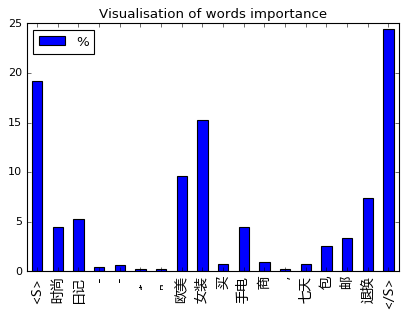

In [29]:
predict('时尚日记--我的欧美女装买手电商,七天包邮退换')

text_ids [1892, 1393, 1509, 340, 726, 7, 3380, 163, 13, 489, 133, 699, 94, 5, 229, 700, 1373, 2304, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 90  53  16  26  12  45   1  26   4   5   2   0   3   1   3   9   9  21
   55 131   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 1892, 1393, 1509, 340, 726, 7, 3380, 163, 13, 489, 133, 699, 94, 5, 229, 700, 1373, 2304, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 90  53  16  26  12  45   1  26   4   5   2   0   3   1   3   9   9  21
  55 131] 512 20
素颜胜带妆,护肤哪家强?[您的品牌]正品特卖
<S> 17.578125
素 10.3515625
颜 3.125
胜 5.078125
带 2.34375
妆 8.7890625
, 0.1953125
护肤 5.078125
哪 0.78125
家 0.9765625
强 0.390625
? 0.0
[ 0.5859375
您 0.1953125
的 0.5859375
品牌 1.7578125
] 1.7578125
正品 4.1015625
特卖 10.7421875
</S> 25.5859375


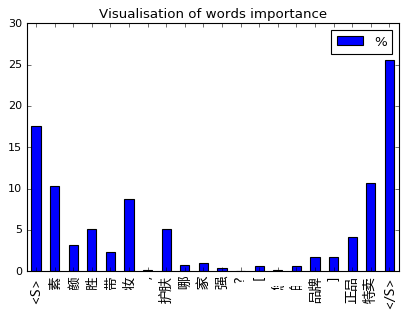

In [30]:
predict('素颜胜带妆,护肤哪家强?[您的品牌]正品特卖')

text_ids [1935, 73, 726, 10396, 4004, 136, 12, 7228, 158, 18953, 7, 4385, 5149, 2304, 82, 271, 154, 1653, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 75  23  33  36  42  31  11   1   8   4   0   0  25   9  23   5  11   9
   16  19 131   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 1935, 73, 726, 10396, 4004, 136, 12, 7228, 158, 18953, 7, 4385, 5149, 2304, 82, 271, 154, 1653, 20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 75  23  33  36  42  31  11   1   8   4   0   0  25   9  23   5  11   9
  16  19 131] 512 21
口碑美妆国货照样让你肌肤水当当,圣诞礼盒特卖低至1折起!
<S> 14.6484375
口碑 4.4921875
美 6.4453125
妆 7.03125
国货 8.203125
照样 6.0546875
让 2.1484375
你 0.1953125
肌肤 1.5625
水 0.78125
当当 0.0
, 0.0
圣诞 4.8828125
礼盒 1.7578125
特卖 4.4921875
低 0.9765625
至 2.1484375
1 1.7578125
折起 3.125
! 3.7109375
</S> 25.585937

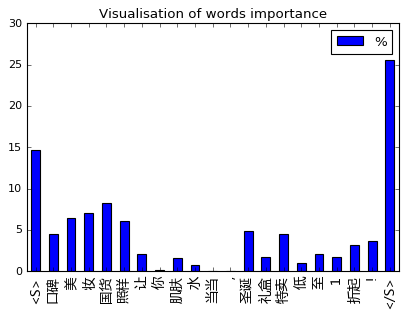

In [31]:
predict('口碑美妆国货照样让你肌肤水当当,圣诞礼盒特卖低至1折起!')

text_ids [79, 81, 51, 139, 11852, 44, 32, 7871, 92, 3, 2545, 595, 81, 283, 2816, 1578, 803, 3, 2085, 4927, 29, 416, 5, 94, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 89  18  13  23  14  40   1   1   7   6   1   9  15   7   4  51  14  11
    2   9  15   6   6   4   2   8 136   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 79, 81, 51, 139, 11852, 44, 32, 7871, 92, 3, 2545, 595, 81, 283, 2816, 1578, 803, 3, 2085, 4927, 29, 416, 5, 94, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 89  18  13  23  14  40   1   1   7   6   1   9  15   7   4  51  14  11
   2   9  15   6   6   4   2   8 136] 512 27
找房费时费力？来中原网，海量二手房/租房信息平台，满足追求高品质的您！
<S> 17.3828125
找 3.515625
房 2.5390625
费 4.4921875
时 2.734375
费力 7.8125
？ 0.1953125
来 0.1953125
中原 1.3671875
网 1.171875
， 0.1953125
海量 1.7578125
二手 2.9296875
房 1.3671875
/ 0.78125
租房 9.9609375
信息 2.734375
平台 2.148437

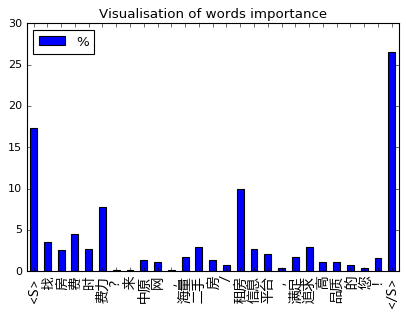

In [32]:
predict('找房费时费力？来中原网，海量二手房/租房信息平台，满足追求高品质的您！')

text_ids [399, 179, 1013, 398, 752, 1550, 110, 94, 80, 255, 13, 7, 80, 3513, 89, 738, 7, 67, 55, 696, 3388, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 72  26  71  27  12  14  20   3   4   5  10   3   0   4  23   2  10   3
    5  11   8  33  10 136   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 399, 179, 1013, 398, 752, 1550, 110, 94, 80, 255, 13, 7, 80, 3513, 89, 738, 7, 67, 55, 696, 3388, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 72  26  71  27  12  14  20   3   4   5  10   3   0   4  23   2  10   3
   5  11   8  33  10 136] 512 24
【装修福利】国际大师为您免费设计家,免费测量出图,仅限100席！
<S> 14.0625
【 5.078125
装修 13.8671875
福利 5.2734375
】 2.34375
国际 2.734375
大师 3.90625
为 0.5859375
您 0.78125
免费 0.9765625
设计 1.953125
家 0.5859375
, 0.0
免费 0.78125
测量 4.4921875
出 0.390625
图 1.953125
, 0.5859375
仅 0.9765625
限 2.1484375
100 1.5625
席

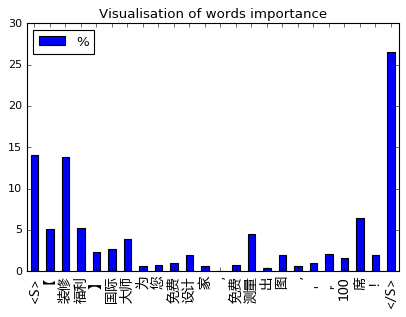

In [33]:
predict('【装修福利】国际大师为您免费设计家,免费测量出图,仅限100席！')

text_ids [105, 3181, 22, 884, 7, 136, 401, 3490, 3484, 27, 1502, 12, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmax_encode [[ 85  30  64  36  64   3   6  13  13  19   3  18   8  18 132   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
---- 50
[2, 105, 3181, 22, 884, 7, 136, 401, 3490, 3484, 27, 1502, 12, 20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 85  30  64  36  64   3   6  13  13  19   3  18   8  18 132] 512 15
专业电视机维修,让它三生三世都陪你!
<S> 16.6015625
专业 5.859375
电视 12.5
机 7.03125
维修 12.5
, 0.5859375
让 1.171875
它 2.5390625
三生 2.5390625
三世 3.7109375
都 0.5859375
陪 3.515625
你 1.5625
! 3.515625
</S> 25.78125


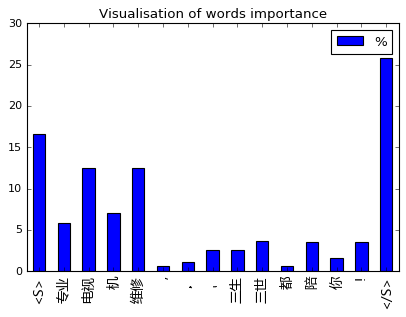

In [34]:
predict('专业电视机维修,让它三生三世都陪你!')